### TITLE: PREDICTION OF HEALTHCARE COST BASED ON THE LENGTH OF STAY IN WISCONSIN HOSPITAL

### INTRODUCTION

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Linear Regression is a linear approach to model the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

### OBJECTIVES

Here our main objective is,  

1) To analyze if there is any relationship between the healthcare cost of patients and their length of stay.

2) Also, we want to predict Healthcare cost for the given length of stay of a patient in the wisconsin hospital.

### PACKAGES AND LIBRARIES

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

### DATA DESCRIPTION

A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The dataset consists of total 6 variables which can be listed below,

AGE: Age of the patient discharged.

FEMALE: Binary variable that indicates if the patient is female.

LOS: Length of stay, in days

RACE: Race of the patient (specified numerically).

TOTCHG: Hospital discharge costs.

APRDRG: All Patient Refined Diagnosis Related Groups

In [ ]:
#Loading the required dataset.
Hospital=pd.read_csv("/content/sample_data/HospitalCosts.csv")

#Viewing 'Hospital' data set.
Hospital

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


### EXPLORATORY DATA ANALYSIS

In [ ]:
#Obtaining the dimension of the dataset.
Hospital.shape

(500, 6)

It is observed that the dataset comprises of 500 records and 6 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any nul values in the dataset.
Hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


From the above table it is observed that there exist one null valuefor the variable race and hence we first have to remove the null value and then we can further proceed with the analysis.

In [ ]:
#Here, in this step we remove the null values from the dataset.
Hospital_N=Hospital.dropna(axis=0,how='any')

#Checking for the null values.
Hospital_N.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

Now, it is observed that there does not exist any null values, thus we can proceed further with the cleaned dataset.

In [ ]:
#Obtaining the descriptive measure using describe() function
Hospital_N.describe()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,5.096192,0.511022,2.829659,1.078156,2777.631263,616.312625
std,6.952706,0.500380,3.366657,0.514746,3891.632405,178.491837
min,0.000000,0.000000,0.000000,1.000000,532.000000,21.000000
25%,0.000000,0.000000,2.000000,1.000000,1218.500000,640.000000
50%,0.000000,1.000000,2.000000,1.000000,1538.000000,640.000000
75%,13.000000,1.000000,3.000000,1.000000,2530.500000,751.000000
max,17.000000,1.000000,41.000000,6.000000,48388.000000,952.000000


Thus, from the above summary we can make out that maximum length of stay for a patient in the hospital is 41 days, which could be due to some severe disease or surgery and the minimum length of stay is 0 day that is the patient might have just visited the hospitalto consult the doctor. It is also observed that the average total charge costed to patients in the hospital is 2777.631263. On similar lines we can draw meaningful insights about the other variables using the summary table.

Since, our main objective is to build a simple linear regression model to predict the Healthcare cost for the given length of stay of a patient in the wisconsin hospital, thus we only concentrate on two variables of the dataset i.e. TOTCHG and LOS. Therefore, we will obtain the visualization of these variables only.Healthcare cost can be taken
as dependent variable (y) and length of stay as dependent variable (x). The model is Y = β0 + β1X + ε

In [ ]:
y=Hospital_N["TOTCHG"]
x=Hospital_N["LOS"]

In [ ]:
# Intialising data of lists.
data1 = {'x':x,'y':y}
# Creating a DataFrame 
hsptl_data = pd.DataFrame(data1)

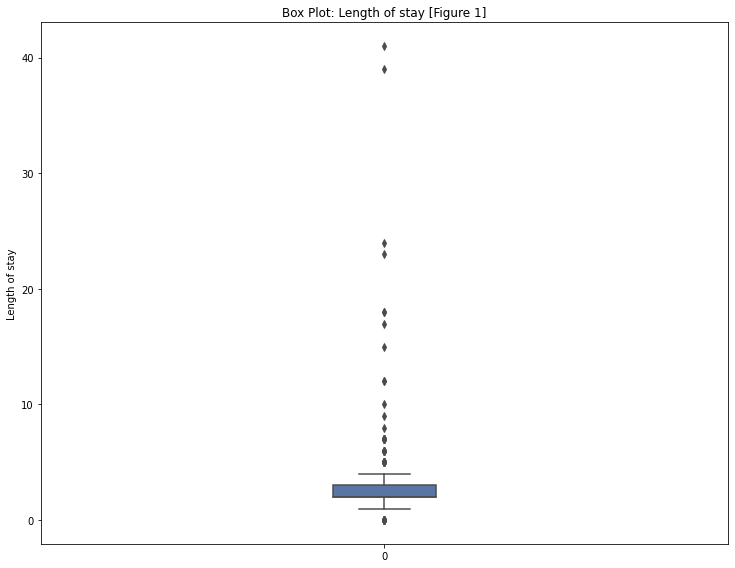

In [ ]:
#Plotting a box plot for Length of stay.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=x,palette='deep',width=0.15,ax=ax)
ax.set_title('Box Plot: Length of stay [Figure 1]')
ax.set_ylabel('Length of stay')
plt.tight_layout()
plt.show()

From the above box plot (figure 1) it is observed that there exists outliers in the data of length of stay of patients in the hospital.

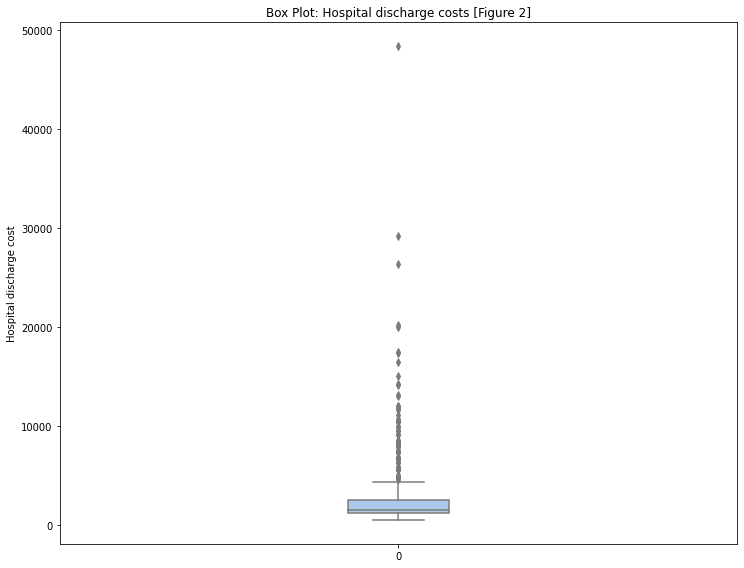

In [ ]:
#Plotting a box plot for Hospital discharge costs.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=y,palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Hospital discharge costs [Figure 2]')
ax.set_ylabel('Hospital discharge cost')
plt.tight_layout()
plt.show()

From the above box plot (figure 2) it is observed that there exists outliers in the data of Hospital discharge costs of patients in the hospital.

Text(0, 0.5, 'Patients')

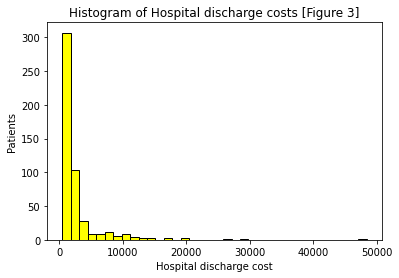

In [ ]:
#histogram for Hospital discharge cost
plt.hist(Hospital_N['TOTCHG'], color = 'yellow', edgecolor = 'black',
         bins = int(180/5))
# Adding labels
plt.title('Histogram of Hospital discharge costs [Figure 3]')
plt.xlabel('Hospital discharge cost')
plt.ylabel('Patients')

From the above histogram i.e. figure 3 it is observed that the data of hospital discharge cost is right skewed.

From the above histogram i.e. figure 4 again it is observed that the data of no. of days of stay is right skewed.

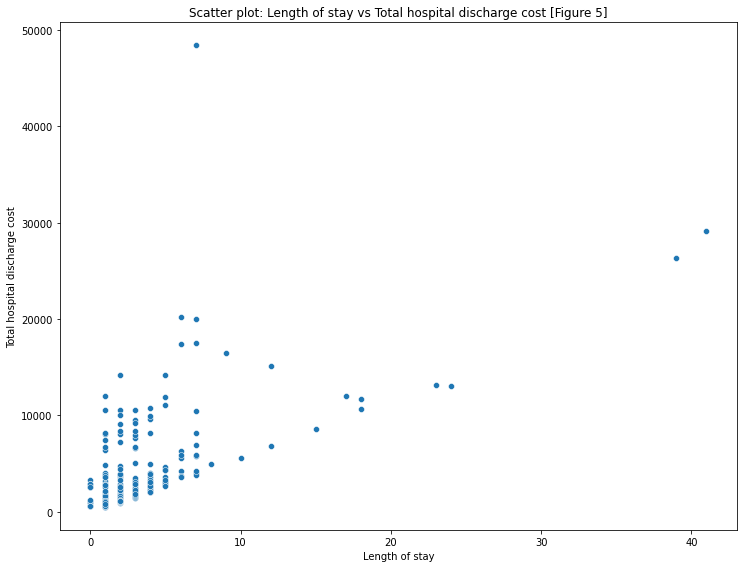

In [ ]:
#Obtaining the scatter plot
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(121)
sns.scatterplot(x=Hospital_N.LOS,y=Hospital_N.TOTCHG,ax=ax)
ax.set_title('Scatter plot: Length of stay vs Total hospital discharge cost [Figure 5]')
ax.set_xlabel('Length of stay')
ax.set_ylabel('Total hospital discharge cost')
plt.tight_layout()
plt.show()

Thus, it is observed that the hospital discharge cost and length of stay are positively correlated that is more the number of days of stay higher will be the discharge cost of that particular patient. 

### ANALYSIS

##### Splitting the dataset into train and test data.

In [ ]:
#importing train_test_split from the sklearn.model_selection library which will help us to split the
#data arrays into two subsets i.e. training data and testing data. 
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the datset into two subsets i.e. training data and testing data.
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 10)

Thus, the dataset has been splitted into train and test data.


In [ ]:
#viewing the train data for length of stay.
x_train

306    1
107    2
351    5
335    6
142    2
      ..
321    1
15     4
485    2
125    2
265    2
Name: LOS, Length: 399, dtype: int64

In [ ]:
#viewing the train data for hospital discharge cost.
y_train

306     783
107    1105
351    4296
335    3656
142    1139
       ... 
321     869
15     2181
485    1273
125    1246
265    1446
Name: TOTCHG, Length: 399, dtype: int64

##### Model Building

In [ ]:
#Importing statsmodels.api library from statsmodels package which is required to build the linear regression model.
import statsmodels.api as lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train_lm=lm.add_constant(x_train)

In [ ]:
#Now we next proceed to build the linear regression model using OLS present in the statsmodels.api.
model=lm.OLS(y_train,x_train_lm).fit()

In [ ]:
#Printing the parameter estimates.
model.params

const    681.783000
LOS      733.596241
dtype: float64

Thus, the parameters Beta0 = 681.783000 and Beta1 =  733.596241 are obtained above.

In [ ]:
#Obtaining the summary of the fitted model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     283.1
Date:                Fri, 06 Aug 2021   Prob (F-statistic):           2.45e-48
Time:                        15:11:09   Log-Likelihood:                -3783.2
No. Observations:                 399   AIC:                             7570.
Df Residuals:                     397   BIC:                             7578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        681.7830    204.596      3.332      0.001     279.557    1084.009
LOS          733.5962     43.603     16.825      0.000     647.876     819.317
==============================================================================
Omnibus:                      578.440   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118174.704
Skew:                           7.386   Prob(JB):                         0.00
Kurtosis:                      86.006   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hence from the above summary of fitted regression model we get the following results,

1. We observe that the intercept is 681.7830 which means that when the length of stay of patient in the hopital is 0 the hospital discharge cost will be 681.7830 that might be basically just the doctor's feetests charge and medicines cost for a patient because in this case patient is just coming consulting the doctor and going back home after taking medicines prescribed or tests done.

2. Next we observe that the slope i.e. the regression coefficient is 733.5962 which means that when the   length of stay is increased by 1 day the hospital discharge cost increases by 733.5962 amount.

3. Hence the fitted simple linear regression model is,
             y=Beta0+(Beta1*x)
             y=681.7830+(733.5962*x)

Hospital discharge cost = 681.7830+(733.5962*Length of stay)
             
4. From the above summary it is also observed that the rvalue that is correlation of coefficient is 0.416 which is evident to the fact that the two variables are slightly positively correlated as mentioned previously observing the scatter plot. Also we observe that the rsquare value that is coefficient of determination is 0.416 which idicates that our model is not a good fit i.e.it is not a good model.

Since p value is less than 0.05 we conclude that the regression coefficients are significant that mean length of stay is having significant effect on hospital discharge cost.

Also from durbin watson statistic 2.013 we say that there is no autocorrelation between errors.

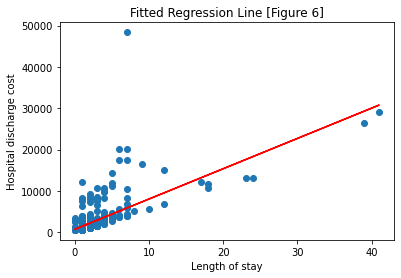

In [ ]:
#Obtaining the visualization of fitted regression line to the train data.
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_train, 681.783000 + 733.596241*x_train, 'r')
plt.title("Fitted Regression Line [Figure 6]")
plt.xlabel("Length of stay")
plt.ylabel("Hospital discharge cost")
plt.show()

Thus, the fitted regressionline is obtained and we conclude that the variables are positively correlated.

##### Residual Analysis

Now, since we have the built regression model, now we check the goodness of fit by validating the assumptions associated with the fitted model.
The following are the assumtions regarding the fitted model,
1.	The relationship beetween y and x1,x2,…x10 is linear.
2.	Errors have zero mean.
3.	Assumption of homoscedasticity, i.e. the errors have   constant variance.
4.	Errors are uncorrelated.
5.	Errors are normally distributed random variables.


To check if the relationship beetween y and x is linear.

From the scatter plot i.e. figure 5 obtained above we can conclude that the relationship between y and x is linear.

In [ ]:
#Obtaining residuals corresponding to the fitted regression model.
y_train_pred = model.predict(x_train_lm)
resid = (y_train - y_train_pred)
resid

306    -632.379241
107   -1043.975482
351     -53.764204
335   -1427.360445
142   -1009.975482
          ...     
321    -546.379241
15    -1435.167963
485    -875.975482
125    -902.975482
265    -702.975482
Length: 399, dtype: float64

Thus, residual of the fitted model are obtained above.

2. To check if the mean of the residuals is 0.

In [ ]:
#Obtaining the mean of the residuals
import statistics
statistics.mean(resid)

-1.869136981087221e-12

From the above calculation we observe that mean of residuals is 0 hence it can be concluded that the errors has mean zero

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


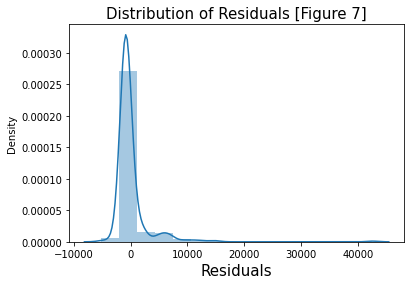

In [ ]:
#Obtaining the distribution plot of residuals.
fig = plt.figure()
sns.distplot(resid, bins = 15)
plt.title('Distribution of Residuals [Figure 7]', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

Thus, it is observed that the residuals are right skewed distributed.

2. To check assumption of homscedasticity i.e. variance of residuals is constant.

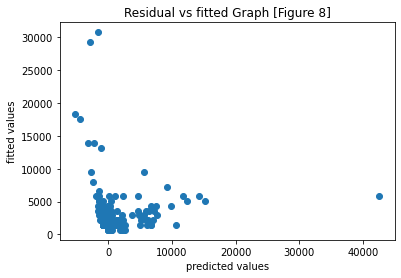

In [ ]:
#Obtaining the scatterplot between predicted values and residuals 
plt.scatter(resid, y_train_pred)
plt.title("Residual vs fitted Graph [Figure 8]")
plt.xlabel("predicted values")
plt.ylabel("fitted values")
plt.show()

Since, the points are not randomly distributed we conclude that the residuals do not have constant variance.

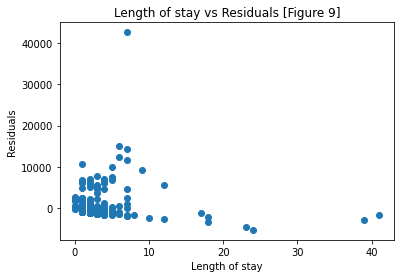

In [ ]:
#Obtaining Length of stay vs Residuals.
plt.scatter(x_train,resid)
plt.title("Length of stay vs Residuals [Figure 9]")
plt.xlabel("Length of stay")
plt.ylabel("Residuals")
plt.show()


5. To check normality assumption i.e to check if the residuals are normally distributed.

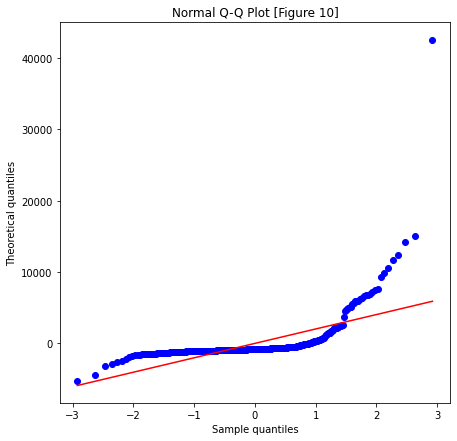

In [ ]:
#Obtaining the Q-Q plot to check for the normality assumption.
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot [Figure 10]")
plt.xlabel("Sample quantiles")
plt.ylabel("Theoretical quantiles")
plt.show()

Thus, it is observed that the above plot is not a straight line hence the errors are not normally distributed.

##### Prediction using test data

In [ ]:
#Predicting the hospital discharge cost using the test data.
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred

151    2148.975482
424    2882.571723
154    2148.975482
190    2882.571723
131    2148.975482
          ...     
50     4349.764204
264    2882.571723
34     2882.571723
78     2148.975482
223    1415.379241
Length: 100, dtype: float64

Thus, we obtain above the predicted values for tes data using the trained model.

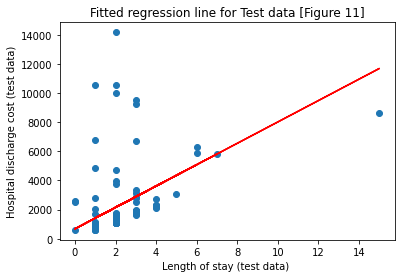

In [ ]:
#Obtaining the visualization of fitted regression line to the test data.
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.title("Fitted regression line for Test data [Figure 11]")
plt.xlabel("Length of stay (test data) ")
plt.ylabel("Hospital discharge cost (test data)")
plt.show()

Above is the fitted regression line to the tested data whose equation is given by,
Hospital discharge cost = 681.7830+(733.5962*Length of stay)

CONCLUSION
Since coeff of determination is also less than 0.5
Since all the assumptions are not satisfied, Hence we conclude that the model obtained is not good. THat is length of stay do not describe the total discharge cost properly.